## **Statistical analysis and ML prediction of player value**

The data used in this project was downloaded from kaggle,https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA23_official_data.csv 
and collected from the game FIFA 23 https://www.ea.com/games/fifa/fifa-23. 
Which is a well respected and established football game, that many rely on for doing statistical analysis on football players.  
It consists of statistics about more than 18000 players with 89 columns for each, ranging from descriptive statistics (metadata) such as name, age, nationality; to more predictive statistics such as a players overall rating and potential.
The data types in the columns include, nominal data, such as what club and what position they play at, numerical data, such as their overall rating. 
However, their is no continous data present, which may seem odd, but keep in mind that the overall rating and potential of a player is carefully constructed values from all types of continous data from the games they have played.
The variables, the x-values, in the descriptive and predictive analysis will be a subset of all the columns present in the dataset. 
This subset will consists of variables that I see fit and are most relevant for the analysis to achieve a good result. 
There will be a careful consideration of what parameter are relevant and not.

The target value, *y*, is a score for each player representing their market value. A players market value is an intrinsically subjective value. There is no de-facto value of a player, only estimates, until the player is bought by another club; and the purchase of a player is not an independent price and doesn't have to fully represent the player's market value, it could be subject to several different factors leading to the price being higher or lower than what it could've been. 

In [62]:
# Importing libraries and downloading data
import numpy as np
import pandas as pd
import scipy.stats as ss
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns

data = pd.read_csv('FIFA_23_Players_Data.csv')
data.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,175,71,2226,471,Liverpool,270000,213700000,RW,2023,11,2017,-,Left,3,4,4,-,-,-,-,High,Medium,90,89,82,90,45,75,80,93,59,84,84,90,84,69,77,88,89,91,90,93,91,83,69,87,75,85,63,55,92,85,86,92,38,43,41,14,14,9,11,14,89,88,88,88,88,88,90,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,199,96,1334,473,Real Madrid CF,250000,191300000,GK,2026,1,2018,-,Left,3,1,4,Belgium,https://cdn.sofifa.net/flags/be.png,GK,1,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,3

In [63]:
# Dropping the columns that are not needed
data.drop(columns=['Image Link', 'On Loan', 'National Team Image Link'], inplace=True)
data.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,Left,4,4,5,Argentina,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,Right,4,4,4,France,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,Right,4,4,5,Poland,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,Right,5,4,4,Belgium,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,Right,4,5,4,France,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,30,175,71,2226,471,Liverpool,270000,213700000,RW,2023,11,2017,Left,3,4,4,-,-,-,High,Medium,90,89,82,90,45,75,80,93,59,84,84,90,84,69,77,88,89,91,90,93,91,83,69,87,75,85,63,55,92,85,86,92,38,43,41,14,14,9,11,14,89,88,88,88,88,88,90,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,30,199,96,1334,473,Real Madrid CF,250000,191300000,GK,2026,1,2018,Left,3,1,4,Belgium,GK,1,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,36,193,93,1535,501,FC Bayern München,72000,22300000,GK,2024,1,2011,Right,4,1,5,Germany,GK,1,Medium,Medium,87,88,91,88,56,91,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,88,91,91,88,43,40,43,43,43,40,50,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,37,187,83,2159,445,Manchester United,220000,77900000,SUB,2023,7,2021,Right,4,5,5,Portugal,ST,7,High,Low,81,92,78,85,34,75,80,93,90,80,86,85,81,79,75,88,79,83,77,94,67

#### **Q-Q plot of the relation between the training data and the validation data**  
The three paramaters chosen for the plot:
* Age 
* Potential
* Market Value

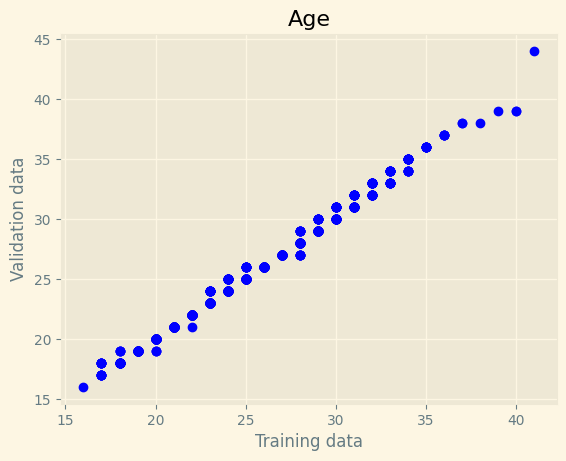

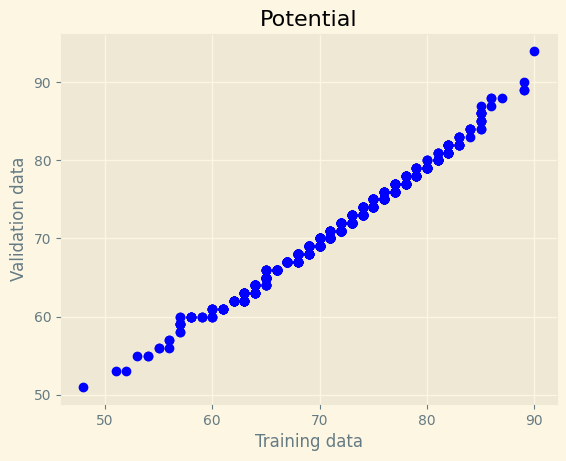

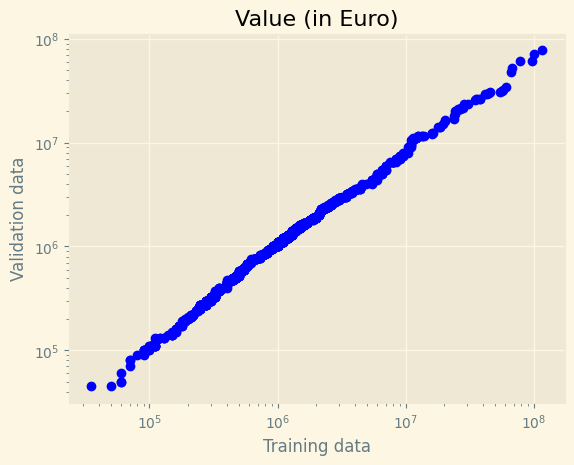

In [205]:
# TODO: should be refined
from random import sample
# Splitting the data into training and test data
split_point = int(0.80*len(data))
# Since the data is order by overall, the data needs to be shuffled
# in order to avoid skewed results
shuffled_data = data.sample(frac=1)
train_data = shuffled_data[:split_point]
test_data = shuffled_data[split_point:]

# Further splitting the training data into training and validation data, for qq-plot
split_point = int(0.80*len(train_data))
qq_train = train_data[:split_point]
qq_validation = train_data[split_point:]

def qq_plot(d1, d2, sample_size, title="", xlabel="", ylabel="", norm=False, log=False):
    if norm:
        x = sample(list(map(lambda x: x * 0.01, d1)), sample_size)
        y = sample(list(map(lambda x: x * 0.01, d2)), sample_size)
    else:
        x = sample(d1, sample_size)
        y = sample(d2, sample_size)
    fig, ax = plt.subplots()
    ax.scatter(np.sort(x), np.sort(y), color='blue')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if log:
        ax.set_xscale('log')
        ax.set_yscale('log')
    ax.set_title(title)

xlabel = "Training data"
ylabel = "Validation data"
qq_plot(list(qq_train['Age']), list(qq_validation['Age']), 1000, 
        title='Age', xlabel=xlabel, ylabel=ylabel)
qq_plot(list(qq_train['Potential']), list(qq_validation['Potential']), 1000,
            title='Potential', xlabel=xlabel, ylabel=ylabel)
qq_plot(list(qq_train['Value(in Euro)']), list(qq_validation['Value(in Euro)']), 1000, 
            title='Value (in Euro)', xlabel=xlabel, ylabel=ylabel, log=True)

### **Problem statement**  
The goal of this project is to create a model that predict, from the given data, a football players market value. The result will be compared to established market value predictors and the comparison will act as an evaluation of how good the models are. Futhermore, there will be a careful statistical analysis of the data, in general and more specifically how it's used in the models, what parameters are of interest and how that can and will impact the results.  

The market value of players are of intereset for several reasons.
Mainly to put a label on a given player, the worth of a player, in an economical sense. 
Football is a sport as well as a business. 
In order to compete a club must develop and aquire new players. 
Statistical analysis have been a huge part of sports for many years now and carefully developed models can give a club a big edge over others, by, for instance in the case of predicting market value, finding and aquiering players below their *actual* market value, the process of what some could call "finding hidden gems".

### **Descriptive analysis**  
To give some more intuition and insight into the dataset, the histograms of some select variables will be shown.  

**Variables**
* Age
* Height in centimeters
* Weight in kilograms
* Pace Total (Acceleration, Sprint speed)
* Shooting Total (Positioning, Finishing, Shot Power, Long Shots, Volleys, Penalties)
* Passing Total (Vision, Crossing, FK. Accuracy, Short Passing, Long Passing, Curve)
* Dribbling Total (Agility, Balance, Reactions, Ball Control, Dribbling, Composure)
* Defending Total (Interceptions, Heading Acc., Def. Awareness, Standing Tackle, Sliding Tackle)
* Physicality Total (Jumping, Stamina, Strength, Aggression)  

What's worth discussing before analysing the varaibles with "Total" in them, is that these are an aggregated stat from all the other stats in the parentheses after them.
For instance, the "Shooting Total"-stat is some type of aggregated stat from the following stats.
Positioning, Finishing, Shot Power, Long Shots, Volleys and Penalties.
EA Sports (creators of FIFA 23) doesn't disclose how these total stats are computed exactly, but whats obvious is that is some type of weighted average, with all weights being close to 1.

(Since we doesn't exactly know how these totals are computed, we will, in the prediction section, compute our own totals, but for now, these are insightful statistics to explore the dataset.)

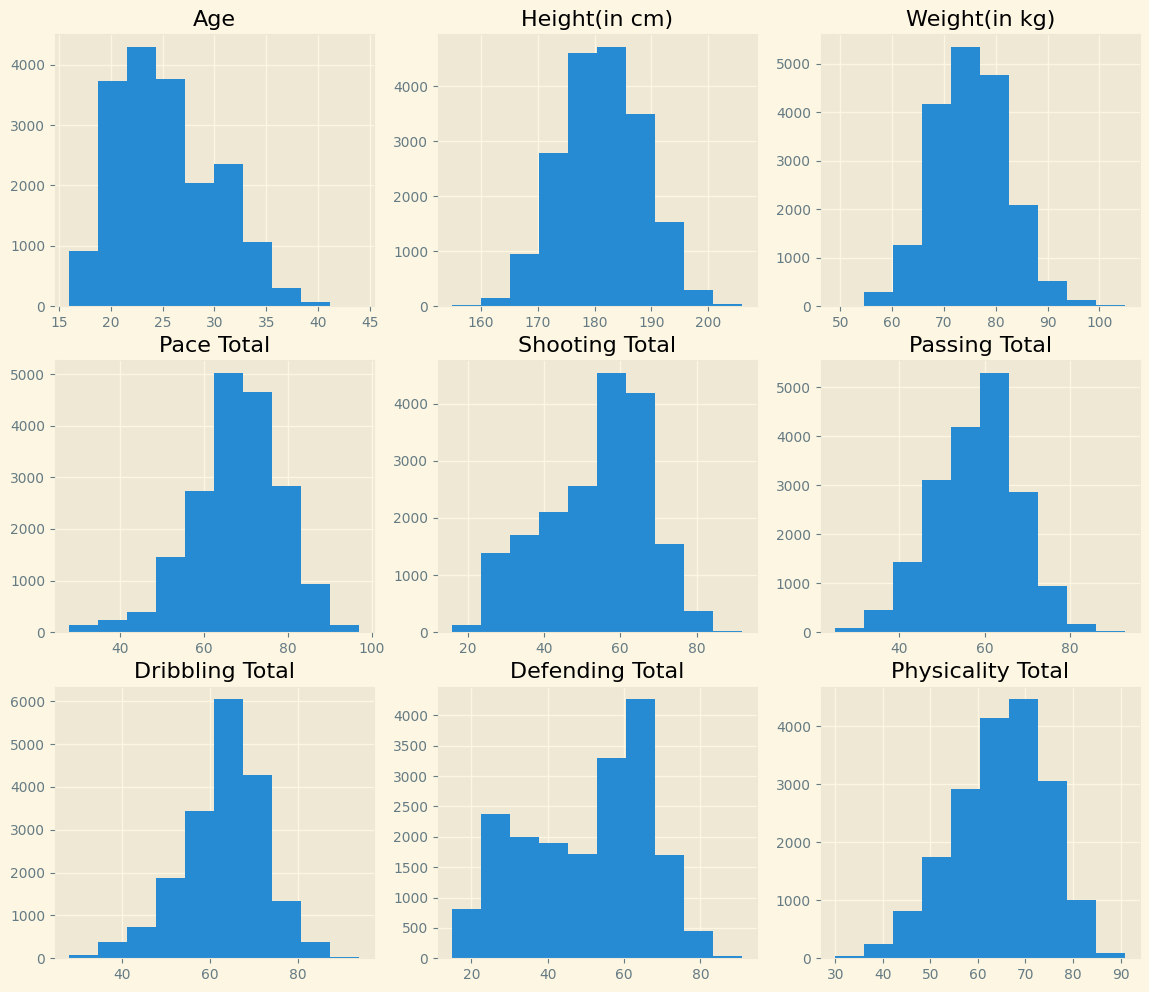

In [154]:
def plot_histograms(labels, data, density=False):
    fig, axes = plt.subplots(int(len(labels) / 3), 3, figsize=(14, 12))
    row = 0
    for i in range(len(labels)):
        if i != 0 and i % 3 == 0:
            row += 1
        axes[row, (i % 3)].set_title(labels[i])
        axes[row, (i % 3)].hist(data[labels[i]], density=density)

labels = ['Age', 'Height(in cm)', 'Weight(in kg)', 'Pace Total', 'Shooting Total', 
'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']

plot_histograms(labels, data)

As we can see, the histograms of most of the variables approximates a normal distribution, "approximates" since all variables have discrete values, especially height and weight.
However, some are more skewed than others and there are some exceptions; Age and Defending Total. 
The distibution of Age approximates more of a Beta distibution.
Sport in general favors the young, football is no exception. 
It is much more common for clubs to bring in a young player, say in the range 16-22 other than older players, 35-40.
The reasons are quite obvious, younger players have more potential, are more physically fit and have a longer carrer ahead of them.
Defending have a more unique distribution.
One could view defending as the moste niche skill of all the skills listed above. And the distribution seems to back up that claim. Non-defenders doesn't nearly have the same defensive workload and due to this fact, that skill is valued less, especially for attackers.
However, the same niche-argument could be said about shooting.
We can observe that the distribution for Shooting Total is also more flat than others, but not to the same extent as defending. So there's definetly a correlation, but defending seems to be valued less for non-defensive players, than shooting for non-attacking players.

Other skills, like dribbling and passing, which are summed up by Dribbling Total and Passing Total seems to approximate more of a normal distribution, even though it's discrete. These skills are more general, meaning that they are less positional related skills, i.e. they are valued almost equally independent of what position one plays. Thus it's more common for players to have stats closer to the mean value.


#### Dependent Variables  
Let's look at the dependence of some variables. 
The dependence of the variables in the aggregated variables, the "Total"-stats are obvious, but some are more dependent on each other than what others are. 
For more intereseting observations, let's look at the dependence of some variables that are cross-categorie, e.g. one from stat from Dribbling Total and one from Passing Total.

##### Finishing and Heading Accuracy
For strikers (red) and center backs (blue) respectively

<AxesSubplot: xlabel='Finishing', ylabel='Heading Accuracy'>

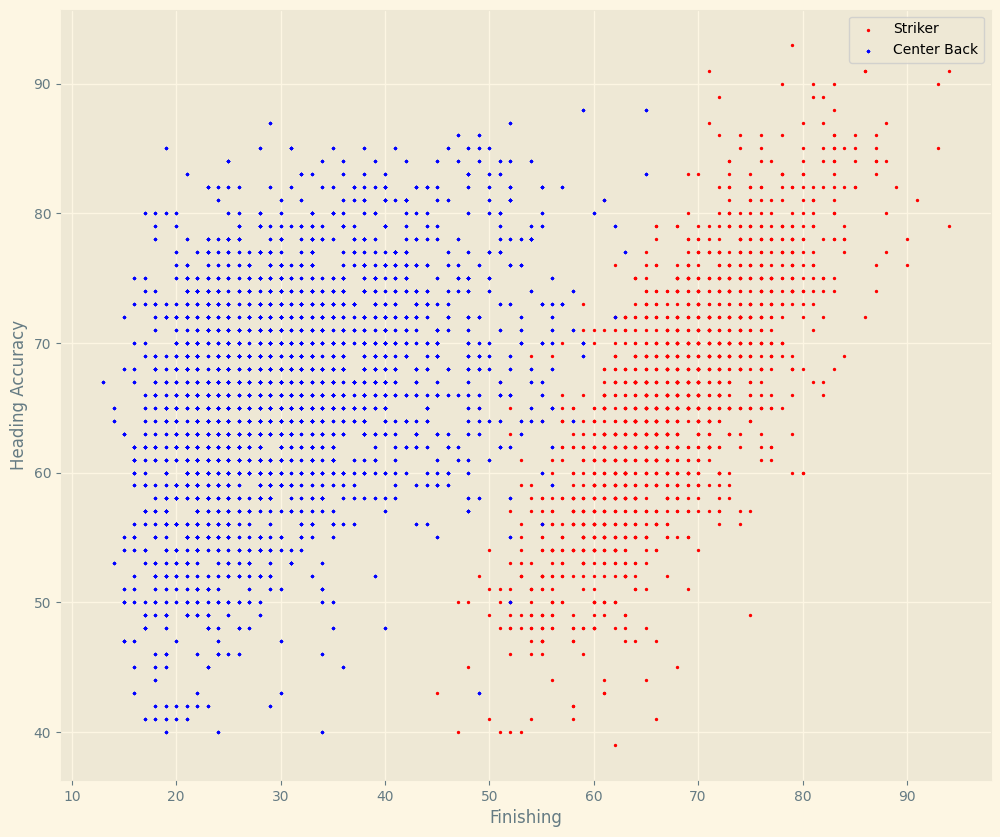

In [5]:
# Scatter Plot of x = long shots and y = fk. accuracy
# TODO: Maybe change this to seaborn
fig, ax = plt.subplots(1,1,figsize=(12, 10))
data.query("`Positions Played`=='ST'").plot(x="Finishing",
                                        y="Heading Accuracy",
                                        kind='scatter',
                                        label="Striker", marker="o", ax=ax, s=2, c="red")

data.query("`Positions Played`=='CB'").plot(x="Finishing",
                                        y="Heading Accuracy",
                                        kind='scatter',
                                        label="Center Back", marker="x", ax=ax, s=2, c="blue")

As the scatter plot show, both strikers and center backs have, generally, a high ability of heading. 
A striker having high heading accruacy may not come as a surprise, since their main objective is to score goals, and being capable at heading the ball is a big part of it.
But the same way a striker needs to head the ball in order to score, the center back needs to challenge the striker in the air in order for him to prevent him to score. 
Thus its a highly valuable skill for center backs as well.
Finishing however, is more of a niche skill, defenders are not expected to have good finishing, since it is a very small part of their game, in general and especially compared to strikers. 
The scatter plot supports this claim, very few defenders have good finishing, only a small subset have more than 50, which isn't considered good.
While most strikers have high finishind, which is expected, since it's one of the most valuable skills for a striker.  

These variables are a good example of how certain abilities of a player is highly dependent on what position they play. A defenders market value isn't particularily dependent on their finishing ability, since it's not expected of them. While for a striker it's higly dependent.
Heading accuracy however, is a crucial ability for both positions and the plot supports that claim.

##### Correlation and Covariance

Covariance,  
$$cov(x,y) = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})$$ 
where, $\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$  
Correlation,  
$$corr(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y}, -1 \le corr(x,y) \le 1$$ 
where $\sigma_x = \sqrt{\frac{1}{N-1}\sum_{i=1}^N (x_i - \bar{x})^2}$

Text(0.5, 1.0, 'corr(Overall, Value)')

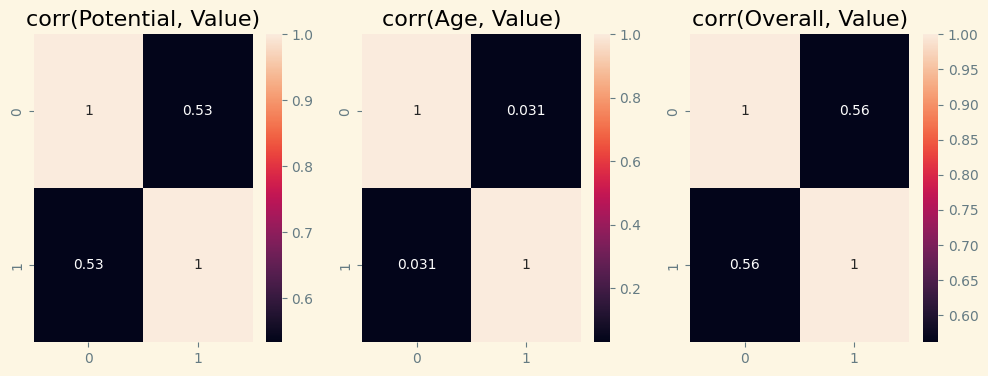

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

corr_pot_val = np.corrcoef(data['Potential'], data['Value(in Euro)'])
corr_age_val = np.corrcoef(data['Age'], data['Value(in Euro)'])
corr_ovr_val = np.corrcoef(data['Overall'], data['Value(in Euro)'])


sns.heatmap(corr_pot_val, annot=True, ax=axes[0])
sns.heatmap(corr_age_val, annot=True, ax=axes[1])
sns.heatmap(corr_ovr_val, annot=True, ax=axes[2])
axes[0].set_title("corr(Potential, Value)")
axes[1].set_title("corr(Age, Value)")
axes[2].set_title("corr(Overall, Value)")


<AxesSubplot: >

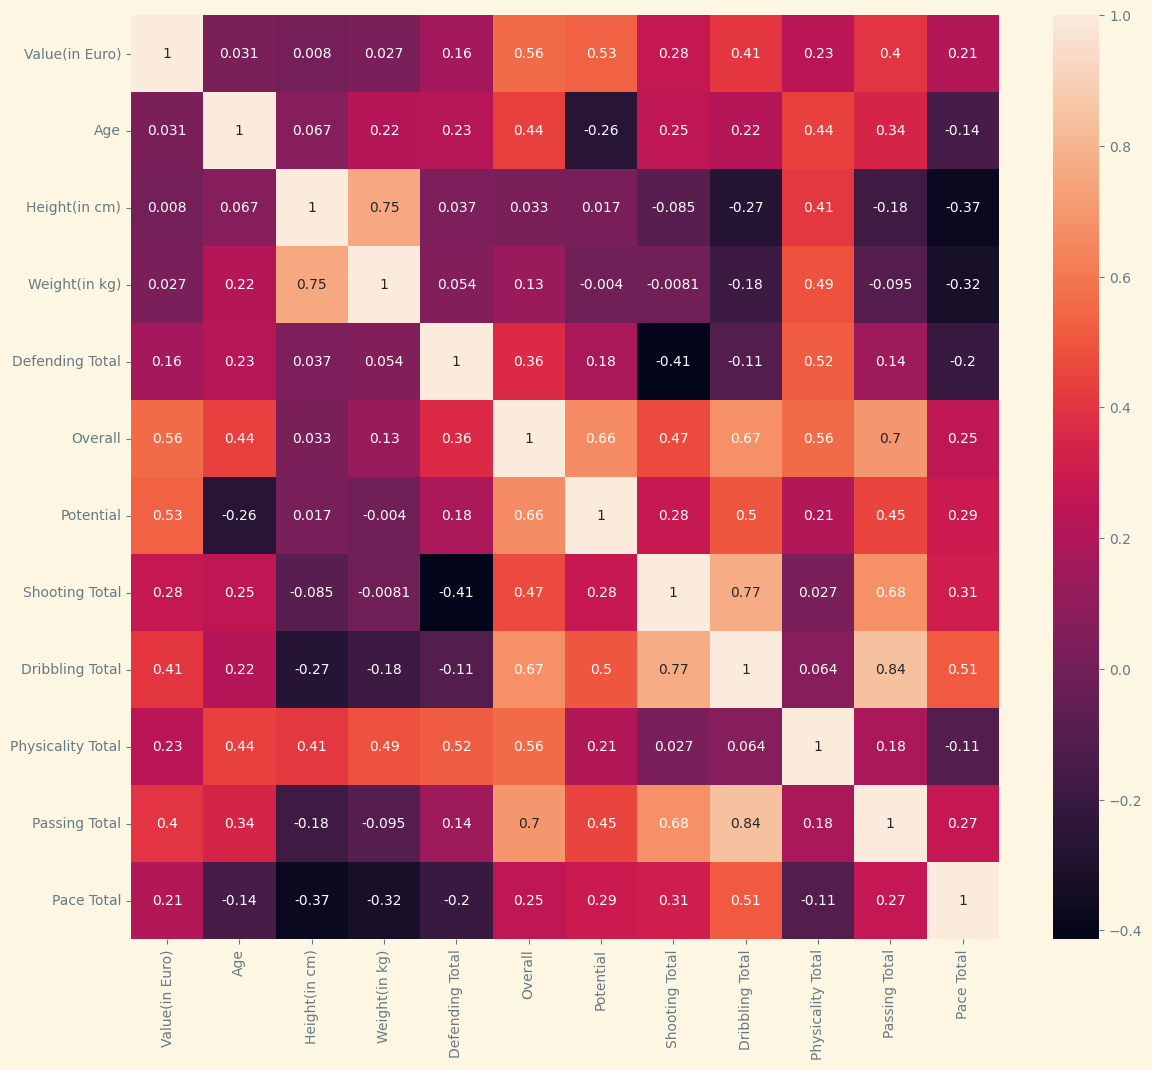

In [7]:
corr = data[['Value(in Euro)', 'Age', 'Height(in cm)',
            'Weight(in kg)', 'Defending Total', 'Overall',
            'Potential', 'Shooting Total', 'Dribbling Total',
            'Physicality Total', 'Passing Total', 'Pace Total']].corr(numeric_only=True)
fig, ax = plt.subplots(1, figsize=(14,12))
sns.heatmap(corr, annot=True, ax=ax)

Some interesting observations can be made from this heatmap of correlations between the displayed variables.
As one can see, not many variables have high correlation to the players market value.
The once with the highest correlation are the most comprehensive statistics, such as "Overall" and "Potential". 
This is not surprising at all, I would've even predicted a higher correlation, given the broad scope and descriptiveness of those two variables.
But this also goes to show that a players market value is a complex value in the sence that many parameters are at play.
We can also see that broader skills, meaning skills that are valuable at any position, such as "Dribbling Total" and "Passing Total" have a considerably higher correlation to market value than the more position-based skills, "Shooting Total" and "Defending Total". 
The physical attributes of a player, "Pace Total" and "Physicality Total" also have considerably lower correlation than the broad skills.
Which is an interesting observation, suggesting that football is a more skill-based sport than physical, which from a broad perspective makes sence.

Since height and weight have close to no correlation to a players market value and no strong correlation to other variables other than each other, these will be dropped from the prediction models.

#### Further exploration of the dataset

Let's dive deeper into some of the variables who's histograms was plotted above and get some further insight.

In [8]:
variables = ['Value(in Euro)', 'Age', 'Height(in cm)',
            'Weight(in kg)', 'Defending Total', 'Overall',
            'Potential', 'Shooting Total', 'Dribbling Total',
            'Physicality Total', 'Passing Total', 'Pace Total']

def print_descriptive_data(data, variables, exclude=[]):
    tmp_vars = []
    for variable in variables:
        if variable not in exclude:
            tmp_vars.append(variable)
        if len(tmp_vars) > 3:
            print(data[tmp_vars].describe())
            tmp_vars = []
    print(data[tmp_vars].describe())

print_descriptive_data(data, variables, exclude=['Value(in Euro)'])

                Age  Height(in cm)  Weight(in kg)  Defending Total
count  18539.000000   18539.000000   18539.000000     18539.000000
mean      25.240412     181.550839      75.173904        50.241383
std        4.718163       6.858097       7.013593        16.392532
min       16.000000     155.000000      49.000000        15.000000
25%       21.000000     177.000000      70.000000        36.000000
50%       25.000000     182.000000      75.000000        54.000000
75%       29.000000     186.000000      80.000000        64.000000
max       44.000000     206.000000     105.000000        91.000000
            Overall     Potential  Shooting Total  Dribbling Total
count  18539.000000  18539.000000    18539.000000     18539.000000
mean      65.852042     71.016668       53.777874        63.109553
std        6.788353      6.192866       13.619867         9.336566
min       47.000000     48.000000       16.000000        28.000000
25%       62.000000     67.000000       44.000000        58.00

As mentioned before, Overall, Potential and all "Total"-stats are possible values in the range 0-100, however, as we can see, the minimum values are seldom below 30. 
We can see a higher standard deviation for the more specific statistics, i.e. the "Total"-stats. 
While both Overall and Potential are more evenly distributed, which again is not surprising, given that they are more general statistics. 
We can also conclude that football is a young mans game, given that the mean age is around 25.2, here we also see the lowest standard deviation out of the variables.

##### Age and Market Value  
One surprising observation from the correlation heatmap was the correlation coefficient for age and player value. I thought that this would be much higher than the result 0.031, which suggests that there is close to no correlation at all.  

Let's take a closer look at the relationship between the two variables to see if there's anything the correlation coefficient missed.

[[1.         0.02563609]
 [0.02563609 1.        ]]


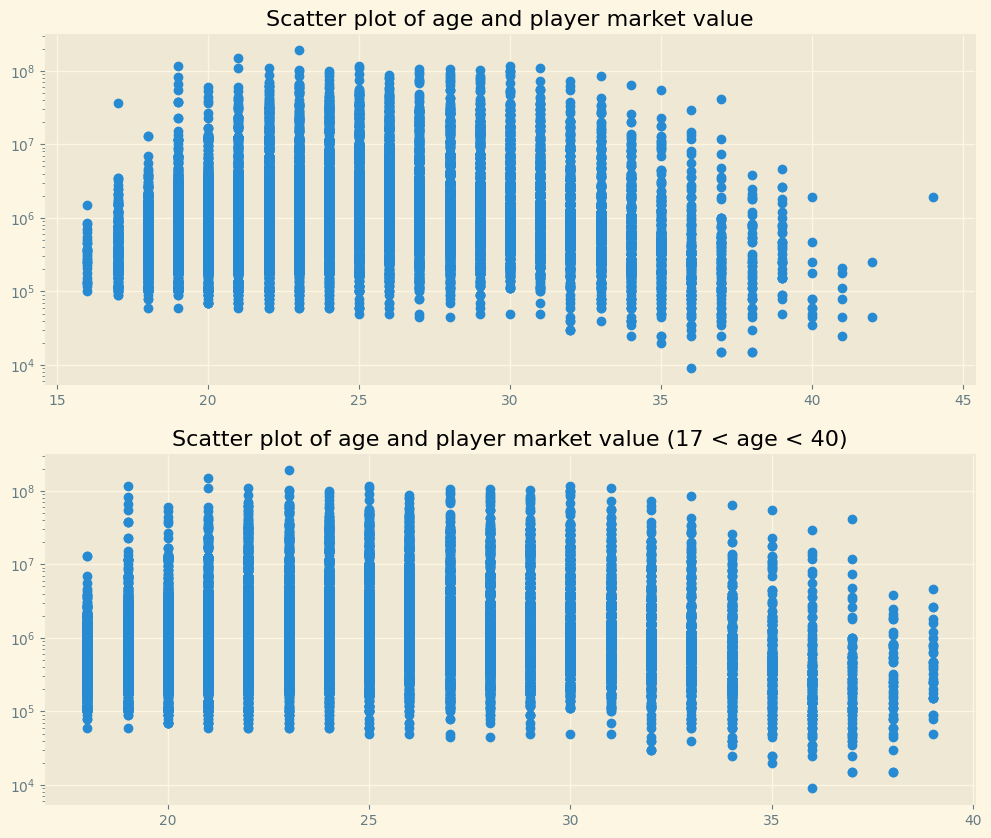

In [9]:
# Age and Market value

age = data['Age']
value = data['Value(in Euro)']
age_value = data.copy().query('Age > 17 & Age < 40')[['Age', 'Value(in Euro)']]
fig, axes = plt.subplots(2, figsize=(12,10))
axes[0].scatter(age, value)
axes[0].set_yscale('log')
axes[0].set_title('Scatter plot of age and player market value')
axes[1].scatter(age_value['Age'], age_value['Value(in Euro)'])
axes[1].set_yscale('log')
axes[1].set_title('Scatter plot of age and player market value (17 < age < 40)')
print(np.corrcoef(age_value['Age'], age_value['Value(in Euro)']))

In [25]:
import plotly.graph_objs as go

fig = go.Figure()
fig = go.Figure(data=go.Scatter(
    x = data['Potential'],
    y = data['Value(in Euro)'],
    mode='markers',
    marker=dict(
        size=14,
        color=data['Age'], #set color equal to a variable
        colorscale='Plasma', # one of plotly colorscales
        showscale=True
    ),
    text= data['Known As'],
))

fig.update_layout(title='Potential vs Value in Euros',
                  xaxis_title='Player Potential',
                  yaxis_title='Value in Euros',
                  paper_bgcolor='rgba(255, 255, 255, 1)',
                  plot_bgcolor='rgba(128, 128, 128, 1)',
                  font=dict(size=12, color='#000000'))
fig.show()

Text(0.5, 1.0, "Player's general position distribution (exluding GK)")

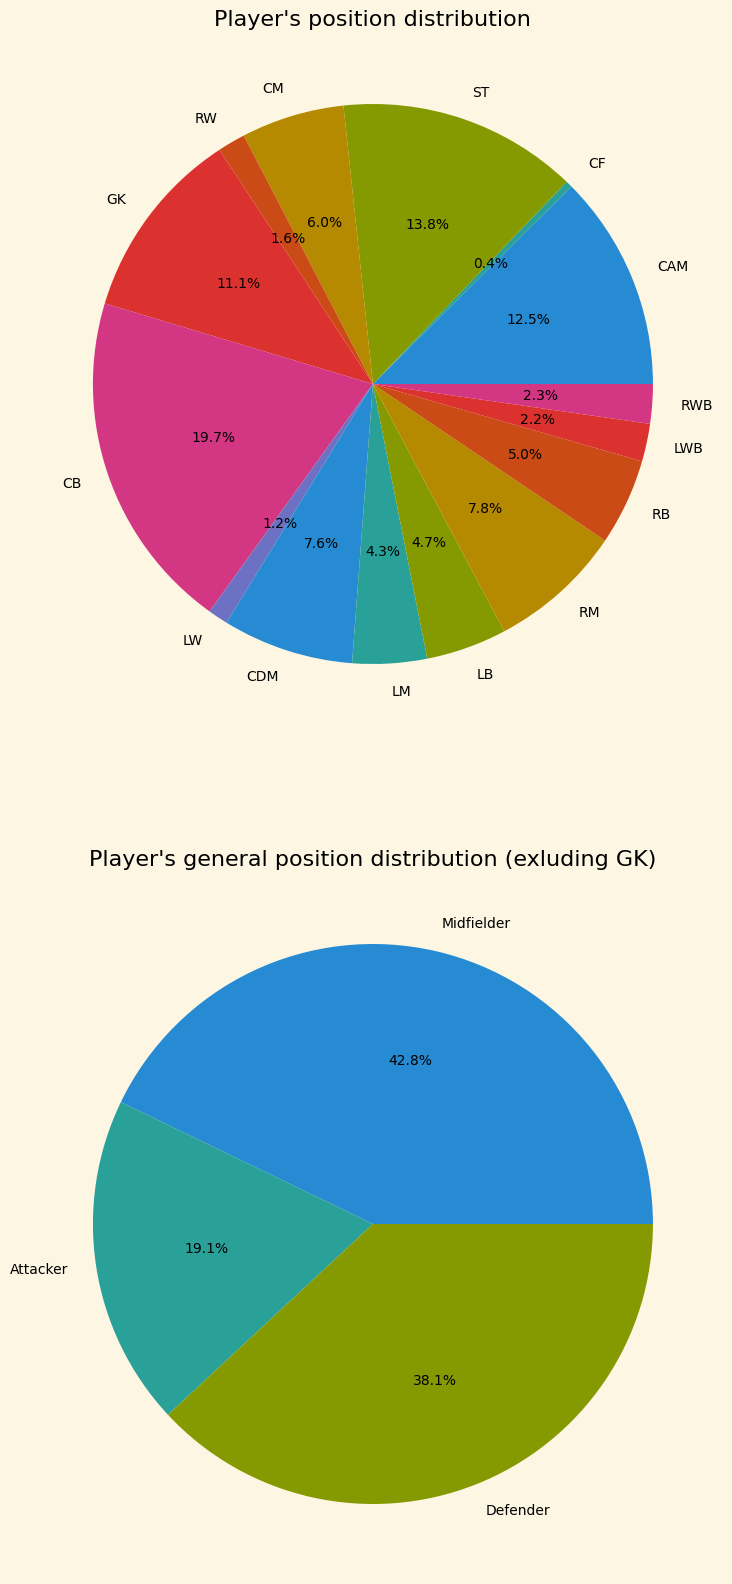

In [10]:
from collections import Counter
from collections import defaultdict
# Pie chart of positions
# We use "Best Position" and not "Positions Played" to extract a unique value for each player
positions = data['Best Position']
counts = Counter(positions)

# Grouping positions by general position 
def group_positions(positions):
    attacker = ['ST', 'CF', 'RW', 'LW'] 
    midfielder = ['CM', 'CAM', 'CDM', 'RM', 'LM']
    defender = ['CB', 'RB', 'RWB', 'LB', 'LWB']
    result = defaultdict(int)
    for key, val in positions.items():
        if key in attacker:
            result['Attacker'] += val
        elif key in midfielder:
            result['Midfielder'] += val
        elif key in defender:
            result['Defender'] += val
        # Exluding GK
        else:
            continue
    return result

general_positions = group_positions(counts)
fig, axes = plt.subplots(2, figsize=(12,20))
axes[0].pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%')
axes[0].set_title('Player\'s position distribution')
axes[1].pie(general_positions.values(), labels=general_positions.keys(), autopct='%1.1f%%')
axes[1].set_title('Player\'s general position distribution (exluding GK)')

The distribution of positions are not particularily even, when looking at all possible positions. 
However, when grouping them up, it's more evenly distributed. 
Note here that we excluded goalkeepers, since we won't include them in our predictive models.
Although, there are more noteably more defenders and midfielders than attackers, I don't think it will have a negative effect on the predictive models.
One problem could be that the model are more biased for defenders and midfielders, but I think that attackers will be the easiest to predict, so I don't think it will be a problem. 
But it's worth noting.

##### Mean value of player market value, each position

<BarContainer object of 15 artists>

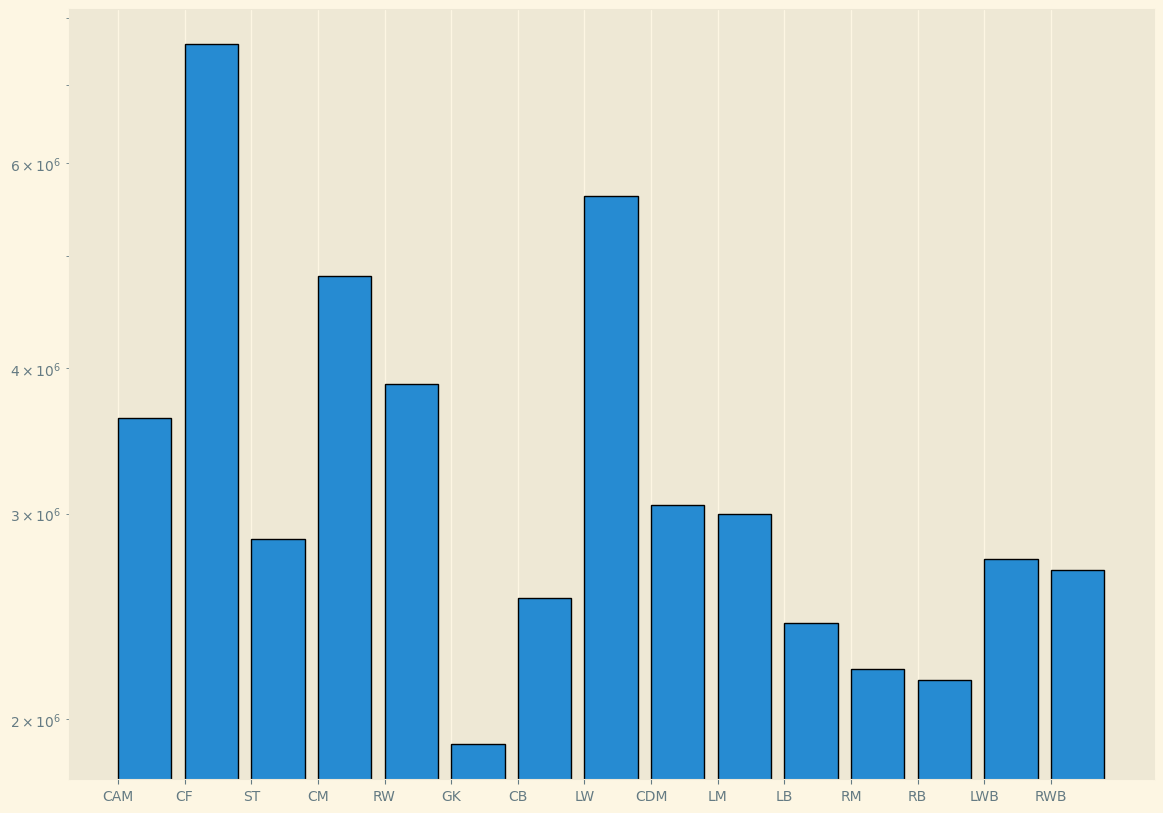

In [11]:
def mean_val_per_pos(data):
    pos_data = data['Best Position']
    res = {}
    for pos in pos_data.unique():
        res[pos] = data.query("`Best Position`==@pos")['Value(in Euro)'].mean()
    return res

mean_vals = mean_val_per_pos(data)
fig, ax = plt.subplots(1, figsize=(14,10))
ax.bar(data['Best Position'].unique(), mean_vals.values(), 
        align='edge', log=True, edgecolor='black')

#### 3D Plot of Player Potential, Overall and Market Value

In [16]:
import plotly.express as px
fig = px.scatter_3d(data.head(15), x='Potential', y='Overall', z='Value(in Euro)', color='Known As')
fig.show()
#ax.set_title("3D Plot of Player Potential, Overall and Market Value")

### **Probability distribution**  
We are going to investigate the following variables further. 
* Passing Total
* Physicality Total
* Shooting Total
* Dribbling Total
* Defending Total
* Pace Total  

Since all this data is discrete, we are going to model their probability mass functions.
Unfortunately there are no continous data present in the datset, so we will not reach further nuance in what proability distributions to investigate.

<BarContainer object of 28 artists>

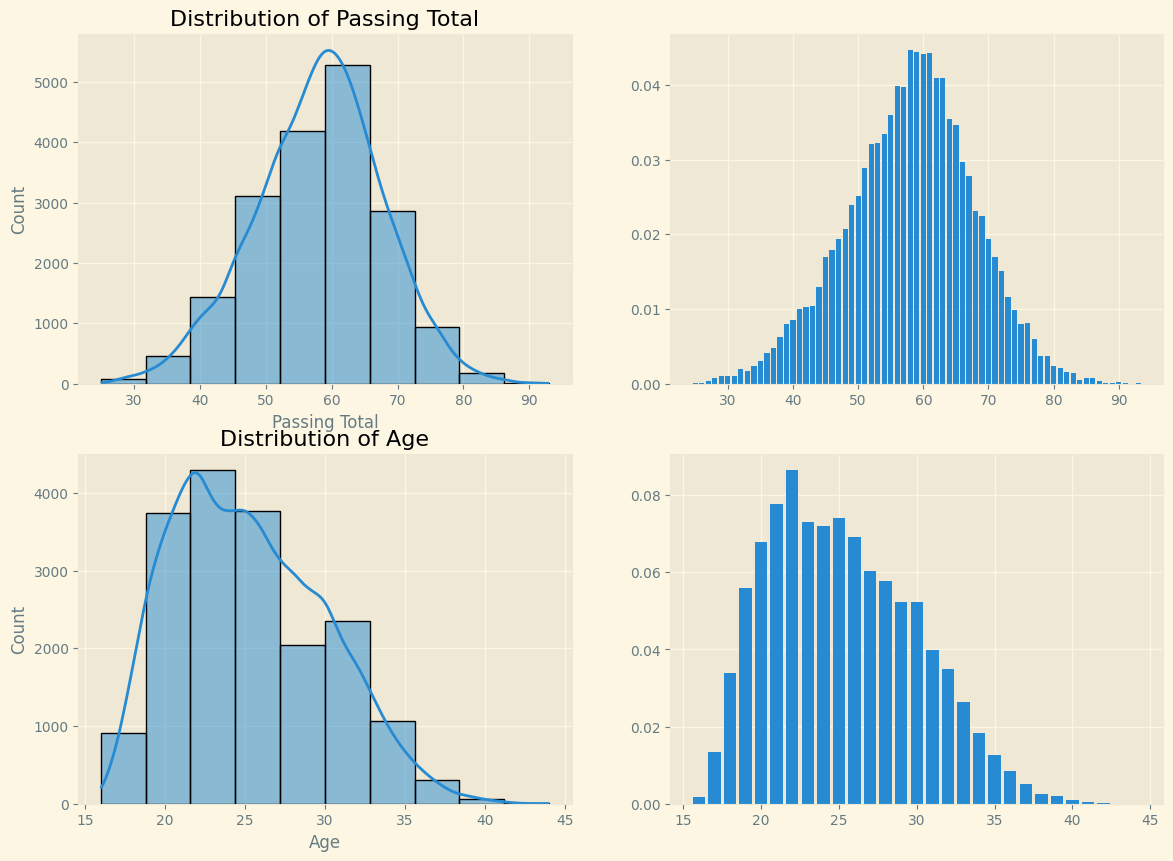

In [166]:
# Passing Total
ps = data['Passing Total']
age_data = data['Age']
probs_ps = ps.value_counts(normalize=True)
probs_age = age_data.value_counts(normalize=True)
fig, axes = plt.subplots(2,2, figsize=(14,10))
sns.histplot(ps, kde=True, bins=10, ax=axes[0,0])
axes[0,0].set_title('Distribution of Passing Total')
axes[0,1].bar(probs_ps.index, probs_ps.values)
sns.histplot(age_data, kde=True, bins=10, ax=axes[1,0])
axes[1,0].set_title('Distribution of Age')
axes[1,1].bar(probs_age.index, probs_age.values)
#ax.plot(data['Passing Total'])

Since the data is discrete, and in the case of "Passing Total" each random variable **x** can take on any value in the range of 1-100, this is a categorical or multinolli distribution. 
However, the plot of the PMF takes on an interesting structure, as stated before, the data seems to approximate the shape of a normal distribution, and here emphasis lies on the word **approximate** since we are talking about discrete data and not continous, which a normal distribution models.
However, we can observe that the most common attributes for a player lies around the mean value and that the further one comes from the mean value, it is an increasing decline in the probability of such a random variable occuring. 
And this decline looks almost the same one both sides of the mean value. 

As discussed before, the PMF of age shows that football favors the young. 
The reasons behind this is quite obvious, since the life time of a footballer isn't particularily long and the competitiveness of the sport at a proffesional level makes it difficult to stay relevant through the trial and tribulations of aging and more specifically the effect it has on someones physique.

##### Hypotheses Test

**Default statement**: Players in the age group [16, 25] are faster than players in the age group [26, 33]. 
More formally, the proportion of players in the age group [16, 25] that have a "Pace Total" of 70 or higher is larger than the proportion of the players in the age group [26, 33] with "Pace Total" of 70 or higher. 

**Experiment**: Measure the "Pace Total" for the respective age ranges, from the data set.  

**Data and random variables**: pace total $y_1, ..., y_n: Y_1, ..., Y_n$ i.i.d. random variables and $o_1, ..., o_n: O_1, ..., O_n$ i.i.d random variables. Where $y$ is the young range and $o$ is the old range.  

**Parameter of interest**: $p_Y$ and $p_O$

**Null hypothesis**: $H_0 : p_Y = p_O$

**Test statistic**: Since we are doing a two-propotion test, the following test statistic will be:  
$$z = (p_Y-p_O) / \sqrt{p(1-p)(1/n_Y+1/n_O)}$$ 
Where, $n_Y$ and $n_O$ are the sample sizes and $p$ is the total pooled proportion, expressed as:
$$p = (p_Y n_Y + p_O n_O)/(n_Y + n_O)$$

**Alternative hypothesis**: $H_A : p_Y > p_0$, which results in a right-tailed test

**Significance level**: $\alpha = 0.05$

Now that we have established these variables and steps, we can conduct the test.


In [196]:
from scipy.stats import norm

def test_stats(young_low, young_high, old_low, old_high):

    print(f"Young age range: [{young_low+1}, {young_high-1}]")
    print(f"Old age range: [{old_low+1}, {old_high-1}]")

    young_group = data.query("Age > @young_low & Age < @young_high")
    old_group = data.query("Age > @old_low & Age < @old_high")

    n_y = young_group.shape[0]
    n_o = old_group.shape[0]
    p_y = young_group.query("`Pace Total` > 69").shape[0] / n_y
    p_o = old_group.query("`Pace Total` > 69").shape[0] / n_o
    print("Proportion for the young group:", p_y)
    print("Proportion for the old group:", p_o)

    p = (p_y*n_y + p_o*n_o)/(n_y+n_o)
    z = (p_y - p_o) / np.sqrt(p*(1-p)*((1/n_y) + (1/n_o)))
    print("z-score:", z)

    # Finding the p-value (not to be confused by p) from the z-score
    p_value = norm.sf(abs(z))
    print("p-value", p_value)

test_stats(15, 26, 25, 34)


Young age range: [16, 25]
Old age range: [26, 33]
Proportion for the young group: 0.47817229336437717
Proportion for the old group: 0.4662458836443469
z-score: 1.5608003910261343
p-value 0.05928542758347401


As we can see by the results the p-value is greater than the significance level $\alpha$, meaning that the test statistic does not fall in the rejection region and we fail to reject the null hypothesis.  
This result is very interesting I thought that we would see a greater difference in the proportions and that the younger age group would be *significantly* faster than the older group, even with the somewhat restricted range. 
But the test proved that claim wrong. One thing worth noting, however, is that the range of age chosen impacts the results heavily. To prove this claim I will show the test statistics for age groups young: [16, 25] and old: [26, 34], i.e. only increasing the range of the "old" players by one year, from 33 to 34.

In [197]:
test_stats(15, 26, 25, 35)

Young age range: [16, 25]
Old age range: [26, 34]
Proportion for the young group: 0.47817229336437717
Proportion for the old group: 0.46047974832874555
z-score: 2.3470160945828704
p-value 0.009462218652274377


Here we see a big difference in the p-value by only increasing the old age range by one. So, a takeaway from these results is that in general, older players are slower than younger players, but in the specific age range for the hypothesis test, the difference isn't significant enough to back up that claim.

### **Predictive analysis**

Our objective is to predict a players market value. We have investigated a subset of interesting parameters, both in general and for the task at hand. Now we will choose what parameters to use for the models.

**Parameters**
* Age
* Overall
* Potential
* Pace Total
* Shooting Total
* Passing Total
* Dribbling Total
* Defending Total
* Physicality Total

One thing worth noting with this selection of variables is that there is no indication of the *economics* of a player. Meaning there is no inclusion of their salary, release clause (at what non-negotiable you can buy out the player) and how long they have left of their contract.
This is intentional, since the model is supposed to evaluate the players from their skill and age only. 
The reason for this is firstly to get a skill-based estimation of the players market value and secondly to not create a too complex model.

For the prediction we will use two types of regression models. Then we will evaluate them and use the prefered one of the two on the test data.
We will start by evaluating the data with Ordinary least square (OLS) linear regression. Where we find the line through the data which have the least squares (errors/distance) and fit it to the data.
In our case, with using multiple variables, we will instead fit *some higher dimension object* to the data.
At the core of linear regression there is an assumption that the relationship between the target variable *y* and the *p-vector* of regressors *x* is linear.

The mathematical expression for an OLS regression model:

$$ y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + ... + \beta_p x_{ip} + \epsilon_i$$
*for $i=n$ observations*

where,
* $y_i$ is the dependent variable (target variable).
* $x_1, x_2, ..., x_p$ are the independent variables.
* $\beta_0$ is the intercept term, it represents the value of $y$ when all the independet are equal to 0.
* $\beta_p$ are the regression coefficients. They represent the change in the dependet value $y$ for each corresponding $x$ value, while all other $x$ values are constant. 
* $\epsilon_i$ is the error term. It represents the difference in the observed value of $y$ and the predicted value of $y$

There are no hyperparameters in OLS regression.

#### Feature Selection and Engineering

We start by evaluating the OLS regression results from our select variables, without any additional manipulation of the data.

In [155]:
import statsmodels.api as sm

# Testing for all numeric data except Value
def OLS_model(data, params, target_label, log=False):
    X = data[params]
    y = data[target_label]

    if log:
        y = np.log(y)

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model

params = ['Age', 'Overall', 'Potential', 'Pace Total', 'Shooting Total', 
'Passing Total', 'Dribbling Total', 'Defending Total', 'Physicality Total']
select_train_data = train_data.copy()
# Dropping Goalkeepers
select_train_data = select_train_data[select_train_data["Best Position"].str.contains("GK")==False]
# Cleaning the data further, removing players with 0 market value
select_train_data = select_train_data[select_train_data["Value(in Euro)"] != 0]


non_log_model = OLS_model(select_train_data, params, target_label='Value(in Euro)')

non_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Value(in Euro)   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     923.1
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:38:36   Log-Likelihood:            -2.2370e+05
No. Observations:               13133   AIC:                         4.474e+05
Df Residuals:                   13123   BIC:                         4.475e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.038e+07   1.04e+06    -38.830      0.000   -4.24e+07   -3.83e+07
Age               -3.745e+05   2.44e+04    -15.343      0.000   -4.22e+05   -3.27e+05
Overall            7.615e+05   2.54e+04     29.964      0.000    7.12e+05    8.11e+05
Potential          7.248e+04    2.1e+04      3.458      0.001    3.14e+04    1.14e+05
Pace Total         9984.0394   6353.395      1.571      0.116   -2469.535    2.24e+04
Shooting Total      2.71e+04   8406.766      3.224      0.001    1.06e+04    4.36e+04
Passing Total      3.036e+04   1.38e+04      2.201      0.028    3324.722    5.74e+04
Dribbling Total   -7.339e+04   1.58e+04     -4.632      0.000   -1.04e+05   -4.23e+04
Defending Total   -6042.6912   6312.046     -0.957      0.338   -1.84e+04    6329.832
Physicality Total -2.417e+04   8361.649     -2.890      0.004   -4.06e+04   -7775.635
==============================================================================
Omnibus:                    18463.407   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7928006.967
Skew:                           8.161   Prob(JB):                         0.00
Kurtosis:                     122.255   Cond. No.                     3.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Judging by the $R^2$-value (Variance explained by the model / Total variance) the model didn't perform well. The main reason behind this is the difference in values between the independent variables and the dependent variable. To capture the relationship better and achieve better results, we will proceed by linearising the target value, Market Value, by taking the logarithm of all the values.

In [156]:
log_model = OLS_model(select_train_data, params, target_label='Value(in Euro)', log=True)
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Value(in Euro)   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 4.828e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:38:42   Log-Likelihood:                 2108.8
No. Observations:               13133   AIC:                            -4198.
Df Residuals:                   13123   BIC:                            -4123.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.4333      0.035     96.864      0.000       3.364       3.503
Age                  -0.1041      0.001   -125.064      0.000      -0.106      -0.102
Overall               0.1870      0.001    215.819      0.000       0.185       0.189
Potential             0.0091      0.001     12.714      0.000       0.008       0.010
Pace Total            0.0015      0.000      6.700      0.000       0.001       0.002
Shooting Total        0.0018      0.000      6.269      0.000       0.001       0.002
Passing Total         0.0003      0.000      0.633      0.527      -0.001       0.001
Dribbling Total      -0.0003      0.001     -0.579      0.563      -0.001       0.001
Defending Total      -0.0013      0.000     -5.891      0.000      -0.002      -0.001
Physicality Total     0.0005      0.000      1.863      0.063   -2.78e-05       0.001
==============================================================================
Omnibus:                      415.429   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1113.328
Skew:                           0.064   Prob(JB):                    1.75e-242
Kurtosis:                       4.421   Cond. No.                     3.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observing the results we get from the OLS Regression, we can conclude that we will move forward with the logarithmic value of the market value, since it yielded much better results, being that the $R^2$ value increased from 0.423 to 0.847, as well as the Akaike information criterion (AIC) and the Bayesian information criterion (BIC) being significantly lower, suggesting a better goodness of fit.
Also, the residuals of the model now have a nearly normal distribution, with Skew and Kurtosis approaching 0 and 4, respectively, which meets the normality assumption. Additionally, the correlation between the features and the target variable has significantly improved.

#### Model Selection

To fit the data we will compare two different regression models; LASSO regression and Polynomial regression

##### LASSO Regression

LASSO (Least Absolute Shrinkage and Selection Operator) regression is a type of linear regression that uses a regularization term to encourage the estimated coefficients to be as small as possible, while still fitting the data well. This can help reduce the compelxity of the model, as well as preventing overfitting. It is very similar to ordinary least squares (OLS) regression, in that it is used to model the relationship between a dependent variable $y$ and one or more independent variables $x_1, x_2, ..., x_n$; and uses the same parameters, with addition to one more.

The mathematical expression for LASSO regression is the same as OLS, but in addition to it, each regression coefficient is subject to the constraint that the sum of the absolute values of the coefficients is less than or equal to a tuning parameter $t$; which is used to contol the amount of reqularization that's applied to the model.
Formally,
$$\sum_{i=1}^p |\beta_i| \leq t$$
where,
* $p$ is the amount of independent variables.
* $t$ is the tuning parameter, which is a hyperparameter specified by the practitioner.

In LASSO regression, the parameters $\beta_i$ are estimated by using an optimisation algorithm to minimises the objective function. The objective function takes the sum of the squared residuals between the predicted response values $\hat{y}$ and the actual target value $y$, plus an a penalty on the magnitude of the coefficients $\beta_i$. The objective function is then minimised by the optimisation algorithm, which searches for the smallest possible values.


In [157]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

# LASSO regression with given alpha and cross-validation
def LASSO_model(data, params, target_value, alpha=1, splits=2, log=False):
    X = data[params]
    y = data[target_value]
    # Split the training data further into training and testing
    kfold = KFold(n_splits=splits, shuffle=True)
    scaler = StandardScaler()
    # Creating the LASSO model with desired regularization strength
    lasso_model = Lasso(alpha=alpha)
    scores = []
    best_predictions = []

    if log:
        y = np.log(y)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Scale the data
        X_scaled_train = scaler.fit_transform(X_train)
        X_scaled_test = scaler.transform(X_test)

        # Fit the model to the training data
        lasso_model.fit(X_scaled_train, y_train)
        # Make predictions to the test set
        predictions = lasso_model.predict(X_scaled_test)
        # Get the R^2 score of the model
        score = lasso_model.score(X_scaled_test, y_test)
        
        if len(scores) < 1:
            pass
        elif score > max(scores):
            # Store the predictions with highest score
            best_predictions = lasso_model.predict(X_scaled_test)
        scores.append(score)

    return scores, best_predictions 

# Evaluating the LASSO regression for alphas in range (0, 1)
for i in range(1, 11):
    alpha = (0 + i/10)
    scores, best_predictions = LASSO_model(select_train_data, params, 'Value(in Euro)', 
                                            alpha=alpha, log=True, splits=10) 
    print(f'LASSO R^2, for alpha {alpha}: mean score: {np.mean(scores)}, best score: {max(scores)}')



LASSO R^2, for alpha 0.1: mean score: 0.9284296845356572, best score: 0.9330763847650367
LASSO R^2, for alpha 0.2: mean score: 0.8949439332030933, best score: 0.9061012384033152
LASSO R^2, for alpha 0.3: mean score: 0.8532010227144816, best score: 0.8618976352741037
LASSO R^2, for alpha 0.4: mean score: 0.7946658727683541, best score: 0.8060384509838168
LASSO R^2, for alpha 0.5: mean score: 0.7195807661435123, best score: 0.7289224802496714
LASSO R^2, for alpha 0.6: mean score: 0.6277147622359256, best score: 0.6346484773272071
LASSO R^2, for alpha 0.7: mean score: 0.519214011408806, best score: 0.5271033369276465
LASSO R^2, for alpha 0.8: mean score: 0.39359934089912363, best score: 0.40289628803420374
LASSO R^2, for alpha 0.9: mean score: 0.25600305338246077, best score: 0.2664601767439678
LASSO R^2, for alpha 1.0: mean score: 0.12494902649961545, best score: 0.1321455572179222


As we can see from the $R^2$-values above, the LASSO regression performs the best with regularisation factor alpha = 0.1. But the mean value ~0.931 nor the best value ~0.944 isn't better than what we achieved with the OLS regression. We will compare these results with Polynomial regression and then decide which one of the two we will use on the test set.

##### Polynomial regression

This type of regression fits a polynomial equation to a set of data. It is used to capture non linear relationships between the independent variables $x_i$ and the dependent variable $y$. However, the model itself is still linear, since the regression coefficients are all linear, it's only the data $x$ that's evaluated at higher degrees. So, the model can fit nonlinear data, but it's still considered a form of linear regression.

The general form of a polynomial regression model is similar to OLS, but has a few more parameters and expressions:

$$ Y = B_{0i} + B_{1i} X_{i} + B_{2i} X_{i}^2 + ... + B_{di} X_{i}^d + E$$

where,
* $Y = \{y_1, y_2, ..., y_n\}$, for $n$ observations
* $B_{ij} = \{\beta_{i0}, \beta_{i1}, ..., \beta_{id}\}$, for $i = 1 ... p$ and $d$ degrees 
* $X_i = \{x_{j1}, x_{j2}, ..., x_{jp}\}$, for $j = 1...n$ and $p$ variables
* $E = \{\epsilon_1, \epsilon_2, ..., \epsilon_n\}$, for $n$ observations

In other words, it is similar to the OLS formula, but in addition; for each independent variable $x_p$ we calculate it for all degrees $d$ with a corresponding regression coefficient $\beta_{pd}$, for all observations $n$.

The hyperparameter of the model is the degree $d$. 
This parameter is chosen by the practitioner and it determines what degree of polynomial one chooses to fit the data. 
In theory one can choose any value of $d$, but to achieve insightful results, in practice $d$ is often relatively small.
This is because a polynomial of a higher degree will overfit the data and the generality of the model is lost.
Due to this consideration of performance vs loss of generality, AIC and BIC are good evaluation methods, since they consider the complexity of the model.
Other hyperparameters may include the choice of optimisation algorithm and regularization strength (similar to LASSO).

The parameter estimation of $\beta_i$ in Polynomial regression is similar to LASSO, in that an optimisation algorithm is used to minimise the objective funtion used. The objective function is the same as the one in LASSO, except for the fact that in this case it doesn't use any penalty for the magnitude of the coefficients. 

In [116]:
select_train_data['Value(in Euro)'].iloc[[1,10,3]]

1      64000000
12    101000000
3     107500000
Name: Value(in Euro), dtype: int64

In [158]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_OLS(X, y, degrees, log=False):
    pol_features = PolynomialFeatures(degree=degrees)
    X_poly = pol_features.fit_transform(X)

    if log:
        y = np.log(y)

    model = sm.OLS(y, X_poly).fit()
    return model 

# With cross validation
def polynomial_regression(X, y, degrees=2, log=False, splits=2):
    poly_features = PolynomialFeatures(degree=degrees)
    model = LinearRegression()
    kfold = KFold(n_splits=splits, shuffle=True)
    scores = []
    best_predictions = []

    if log:
        y = np.log(y)
    
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Training data into polynomial form
        X_poly_train = poly_features.fit_transform(X_train)
        model.fit(X_poly_train, y_train)

        # Test data tranformation to polynomial form
        X_poly_test = poly_features.transform(X_test)

        score = model.score(X_poly_test, y_test)
        if len(scores) < 1:
            pass
        elif score > max(scores):
            # Store the predictions with highest score
            best_predictions = model.predict(X_poly_test)
        scores.append(score)

    return best_predictions, scores

predictions, scores = polynomial_regression(select_train_data[params], select_train_data['Value(in Euro)'],
                                            degrees=4, log=True, splits=5)
print(f'Polynomial regression R^2 mean score: {np.mean(scores)}, max score: {max(scores)}')
poly_ols = polynomial_OLS(select_train_data[params], select_train_data['Value(in Euro)'], 4, log=True)
poly_ols.summary()

Polynomial regression R^2 mean score: 0.9917627943068468, max score: 0.9925045855253715


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Value(in Euro)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2584.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:39:48   Log-Likelihood:                 11806.
No. Observations:               13133   AIC:                        -2.218e+04
Df Residuals:                   12419   BIC:                        -1.684e+04
Df Model:                         713                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.0862     24.744      2.469      0.014      12.584     109.588
x1           -20.3995      1.857    -10.985      0.000     -24.040     -16.759
x2            21.1534      2.083     10.154      0.000      17.070      25.237
x3           -13.8407      2.111     -6.556      0.000     -17.979      -9.703
x4             0.2179      0.379      0.575      0.565      -0.525       0.960
x5            -0.7548      0.547     -1.380      0.168      -1.827       0.318
x6             1.5177      0.774      1.961      0.050       0.000       3.035
x7            -1.4887      0.902     -1.650      0.099      -3.257       0.280
x8            -0.9398      0.380     -2.475      0.013      -1.684      -0.196
x9            -0.7996      0.478     -1.675      0.094      -1.736       0.136
x10            1.0231      0.060     17.173      0.000       0.906       1.140
x11           -1.6839      0.145    -11.621      0.000      -1.968      -1.400
x12            1.7528      0.145     12.108      0.000       1.469       2.036
x13           -0.0220      0.021     -1.031      0.302      -0.064       0.020
x14            0.0653      0.030      2.151      0.031       0.006       0.125
x15           -0.0433      0.042     -1.021      0.307      -0.126       0.040
x16           -0.0216      0.051     -0.421      0.674      -0.122       0.079
x17            0.0465      0.021      2.258      0.024       0.006       0.087
x18           -0.0472      0.029     -1.648      0.099      -0.103       0.009
x19            0.4170      0.077      5.444      0.000       0.267       0.567
x20           -1.2336      0.135     -9.124      0.000      -1.499      -0.969
x21            0.0296      0.025      1.169      0.242      -0.020       0.079
x22           -0.0295      0.032     -0.932      0.351      -0.092       0.033
x23            0.0513      0.046      1.122      0.262      -0.038       0.141
x24            0.0126      0.054      0.233      0.816      -0.094       0.119
x25           -0.0418      0.024     -1.730      0.084      -0.089       0.006
x26            0.1140      0.031      3.730      0.000       0.054       0.174
x27            0.5720      0.070      8.199      0.000       0.435       0.709
x28           -0.0202      0.024     -0.837      0.403      -0.068       0.027
x29            0.0417      0.032      1.299      0.194      -0.021       0.105
x30           -0.0658      0.045     -1.451      0.147      -0.155       0.023
x31            0.0306      0.053      0.573      0.567      -0.074       0.135
x32            0.0551      0.023      2.419      0.016       0.010       0.100
x33           -0.0371      0.029     -1.290      0.197      -0.093       0.019
x34            0.0012      0.003      0.400      0.689      -0.005       0.007
x35            0.0044      0.007      0.662      0.508      -0.009       0.017
x3

In [97]:
print(poly_ols.aic)
print(poly_ols.bic)

-27457.92992359009
-22104.841873280202


As shown above, we achieve very good results with Polynomial regression. After testing with different degrees, the best one, considering the ratio between $R^2$-score and AIC and BIC is with degree 4. The best $R^2$ value we managed to achieve, for degree 4, was ~ 0.9933 and the mean value for 5-cross-validation was ~ 0.9926. This is considerably higher than what we achieved with LASSO regression. One thing to note, however, is that the Polynomial regeression model is more complex. 

Given these results, we choose the Polynomial regression model for the final predictions on the test set we sat aside in the beggining.

##### Final evaluation and results

In [160]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
# Fixing the test data
select_test_data = test_data.copy()
# Drop Goalkeepers
select_test_data = select_test_data[select_test_data["Best Position"].str.contains("GK")==False]
# Cleaning the data further, removing players with 0 market value
select_test_data = select_test_data[select_test_data["Value(in Euro)"] != 0]

X_train = select_train_data[params]
y_train = np.log(select_train_data['Value(in Euro)'])
X_test = select_test_data[params]
y_test = np.log(select_test_data['Value(in Euro)'])

poly_features = PolynomialFeatures(degree=4)
reg_model = LinearRegression()

X_poly_train = poly_features.fit_transform(X_train)
reg_model.fit(X_poly_train, y_train)

# Test data tranformation to polynomial form
X_poly_test = poly_features.fit_transform(X_test)

score = reg_model.score(X_poly_test, y_test)

# Retreiving the predictions
final_predictions = reg_model.predict(X_poly_test)

print(f"R^2 score on the test set: {score}")
print(f"Mean absolute error: {mean_absolute_error(y_test, final_predictions)}")

R^2 score on the test set: 0.992086510779701
Mean absolute error: 0.08181642593866707


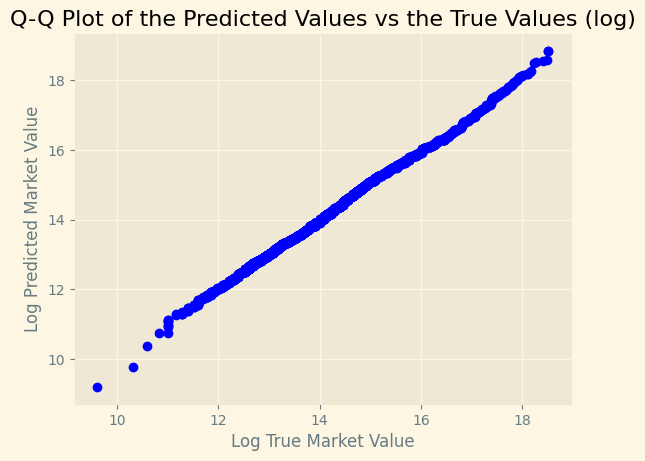

In [208]:
qq_plot(list(y_test), list(final_predictions), len(y_test), 
        title="Q-Q Plot of the Predicted Values vs the True Values (log)",
        xlabel="Log True Market Value",
        ylabel="Log Predicted Market Value")

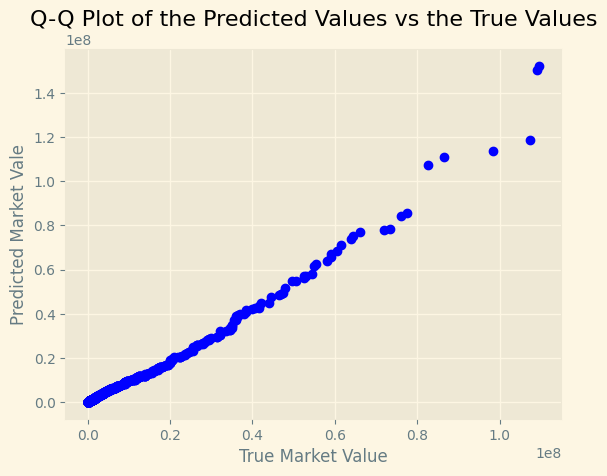

In [211]:
qq_plot(list(np.exp(y_test)), list(np.exp(final_predictions)), len(y_test),
        title="Q-Q Plot of the Predicted Values vs the True Values",
        xlabel="True Market Value",
        ylabel="Predicted Market Vale",)

In [217]:
# Joining the predicted data to the the dataframe of the test data
test_df = select_test_data.copy()
test_df["Predicted Market Value"] = np.exp(final_predictions)
# Sorting it by highest predicted market value
test_df = test_df.sort_values(by="Predicted Market Value", ascending=False) 
test_df = test_df[['Known As', 'Value(in Euro)', 'Predicted Market Value', 'Age', 'Best Position', 'Overall', 'Potential']]
# Formatting the market values, so it's easier to interpret
test_df['Value(in Euro)'] = test_df['Value(in Euro)'].apply(lambda x: '{:,}'.format(int(x)))
test_df['Predicted Market Value'] = test_df['Predicted Market Value'].apply(lambda x: '{:,}'.format(int(x)))
test_df = test_df.rename(columns={'Value(in Euro)':'Market Value (Euros)', 'Predicted Market Value':'Predicted Market Value (Euros)'})
test_df

,Known As,Market Value (Euros),Predicted Market Value (Euros),Age,Best Position,Overall,Potential
20,Rúben Dias,"107,500,000","152,309,788",25,CB,88,91
36,M. Verratti,"77,500,000","150,670,369",29,CM,87,87
19,N. Kanté,"72,000,000","118,696,277",31,CDM,89,89
63,Vinícius Jr.,"109,000,000","113,741,980",21,LW,86,92
59,L. Martínez,"98,500,000","111,246,609",24,ST,86,90
...,...,...,...,...,...,...,...
17792,Song Zhiwei,"60,000","47,129",33,CB,53,53
18529,Guo Yunqi,"60,000","46,906",25,CAM,48,51
18302,Gou Junchen,"40,000","31,904",32,CB,51,51
18466,Huo Liang,"30,000","17,506",32,RB,49,49


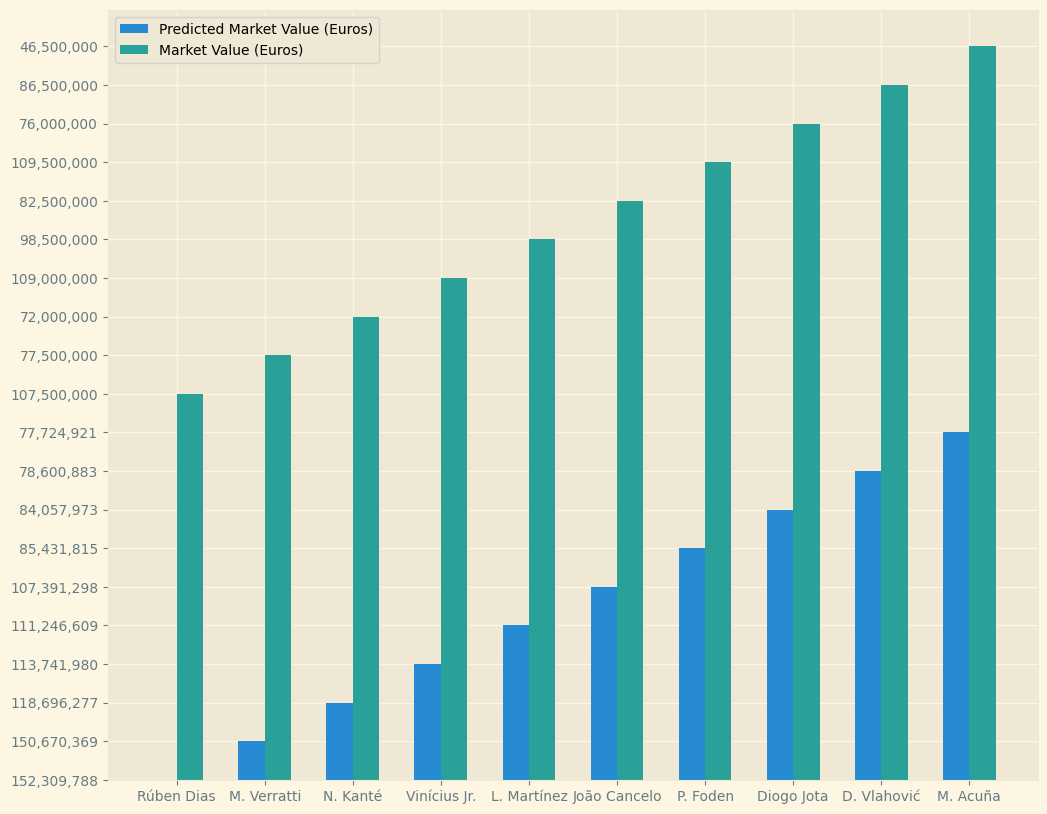

In [220]:
# Top 10 most expensive players according to the prediction model
def show_highest_market_value(players):
    names = players['Known As']
    pred_market_val = players['Predicted Market Value (Euros)']
    true_market_val = players['Market Value (Euros)']
    
    x = np.arange(len(names))
    width = 0.3

    fig, ax = plt.subplots(1, figsize=(12,10))
    b1 = ax.bar(x - width/2, pred_market_val, width, label='Predicted Market Value (Euros)')
    b2 = ax.bar(x + width/2, true_market_val, width, label='Market Value (Euros)')

    ax.set_xticks(x)
    ax.set_xticklabels(names)
    ax.legend()

show_highest_market_value(test_df.iloc[:10])
        

### **Conclusion**

An important thing to note is that overfitting isn't as big of a problem, since the data is very descriptive of the overall objective. That is, 